In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor



In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import pickle


/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-FSU53.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Tennessee95.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-WashU32.SpaceOne
/cluster/s

In [4]:
## NB numpy version was 1.19.5. Was not working so upgraded to 1.20.0
import grakel

In [5]:
np.__version__

'1.24.4'

In [6]:
import importlib
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [32]:
n = 1000
d=3
tau=2.5
alpha=1.5
desiredAvgDegree= 60.0

# Generate a GIRG with both failure rate and chung-lu mixin for realism??
g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsCube)

# g = generation.chung_lu_mixin_graph(g, weights, 0.5)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			1000, 20082
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040204
clustering coefficient		0.494147
min/max/avg degree		3, 801, 40.164000
degree assortativity		-0.107016
number of connected components	1
size of largest component	1000 (100.00 %)


In [29]:
fe = feature_extractor.FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(1, utils.LCC, cube=True, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
starting search at const=0.6234375; depth=6: For alpha=100.0
a: 0.31171875, m: 0.6234375, b: 1.246875, f_a: 24.36, f_m: 39.54, f_b: 67.66, goal: 40.76
a: 0.6234375, m: 0.9351562499999999, b: 1.246875, f_a: 39.54, f_m: 57.42, f_b: 67.66, goal: 40.76
a: 0.6234375, m: 0.779296875, b: 0.9351562499999999, f_a: 39.54, f_m: 49.28, f_b: 57.42, goal: 40.76
a: 0.6234375, m: 0.7013671875, b: 0.779296875, f_a: 39.54, f_m: 44.7, f_b: 49.28, goal: 40.76
a: 0.6234375, m: 0.66240234375, b: 0.7013671875, f_a: 39.54, f_m: 45.3, f_b: 44.7, goal: 40.76
calling goal_f(alpha=2.0)
starting search at const=0.36837905070728433; depth=6: For alpha=2.0
a: 0.18418952535364216, m: 0.36837905070728433, b: 0.7367581014145687, f_a: 22.98, f_m: 39.52, f_b: 64.8, goal: 40.76
a: 0.36837905070728433, m: 0.5525685760609265, b: 0.7367581014145687, f_a: 39.52, f_m: 53.66, f_b: 64.8, goal: 40.76
a: 0.36837905070728433, m: 0.4604738133841054, b: 0.5525685760609265, f_a: 39.52, f_m: 48.0, f_b: 53.66

In [30]:
nk.overview(g_out)

Network Properties:
nodes, edges			100, 2087
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.421616
clustering coefficient		0.674876
min/max/avg degree		13, 86, 41.740000
degree assortativity		0.017288
number of connected components	1
size of largest component	100 (100.00 %)


array([[1.]])

cl
0.9999995701607464
0.9999997749719379
0.9999995101199473
1
0.9999988834947925
0.9999993104038906
0.9999996668405484
2
0.9999983586931588
0.9999994748974379
0.9999987401833055
3
0.9999984794723914
0.999999560373811
0.9999987267956038
4
0.999996347195307
0.9999986411056067
0.9999985853388019


<AxesSubplot: >

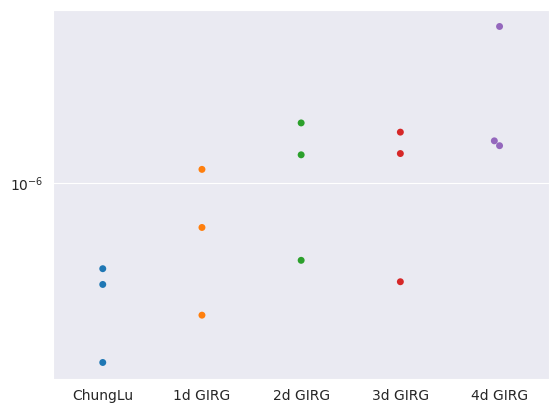

In [33]:
import warnings
import seaborn as sns
gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])

def fit_cube(g, kernel, d=1, name='sofcb-Reed98'):
    fe = feature_extractor.FeatureExtractor([])
    info, g_out = fe.fit_ndgirg_non_c_implementation(d, utils.LCC, cube=True, copy_weights=True, verbose=False)(g)

    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return kernel.transform([g_gk1])[0, 0]


name='n=1000 3D GIRG tau=2.5 a=1.5 dbar=40 LCC deg fit cube'
outs = []
n_per = 3
outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = rw_kernel.transform([g_gk1])[0, 0]
    print(out)
    outs[-1].append(out)

for d in range(1, 5):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = fit_cube(g, rw_kernel, d=d, name=name)
        outs[-1].append(out)
        print(out)

data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG', '4d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			3000, 75471
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016777
clustering coefficient		0.475675
min/max/avg degree		7, 1956, 50.314000
degree assortativity		-0.071789
number of connected components	1
size of largest component	3000 (100.00 %)


array([[1.]])

cl
0.9999997099386978
0.9999997061071825
0.9999996616791369
1
tau=2.7513937461729405|alpha=1.5773259396179913|const=0.20825210623533336|target_lcc=0.4756748645635051|fit_lcc=0.47690900728183744|fitting_time=129.8333101272583|hist=[(2.0, 0.5942457602950473), (1.342281879194631, 0.3798800131897682), (1.6064257028112447, 0.48845613572076035), (1.462522851919561, 0.4295671215065865), (1.5311004784688993, 0.45952083347508227), (1.5678588926996568, 0.47352206165296645), (1.5869080089263574, 0.477658681696511), (1.5773259396179913, 0.4772943087455137)]
50.44
0.47690900728183744
0.9999990349113269
tau=2.7513937461729405|alpha=1.5678588926996568|const=0.2065365604823593|target_lcc=0.4756748645635051|fit_lcc=0.473872423388239|fitting_time=129.3624141216278|hist=[(2.0, 0.592403633656139), (1.342281879194631, 0.3784136138990016), (1.6064257028112447, 0.48764224216862384), (1.462522851919561, 0.43309681942602735), (1.5311004784688993, 0.46192275408091243), (1.5678588926996568, 0.4698613403048634), 

<AxesSubplot: >

Text(42.722222222222214, 0.5, '1 - RW kernel with original graph')

Text(0.5, 23.52222222222222, 'Graph Generating Model')

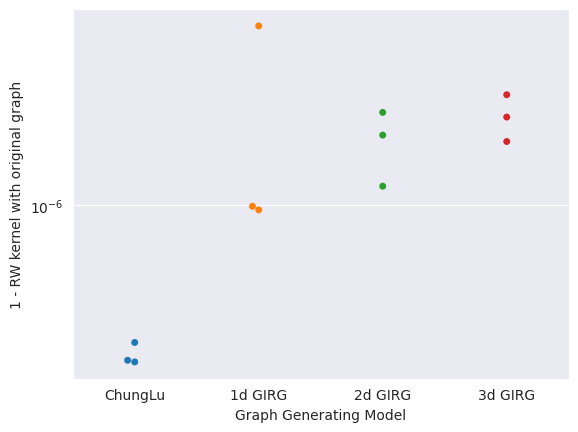

In [36]:
n = 3000
d=2
tau=2.5
alpha=1.5
desiredAvgDegree= 60.0

# Generate a GIRG with both failure rate and chung-lu mixin for realism??
g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsCube)

# g = generation.chung_lu_mixin_graph(g, weights, 0.5)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)



import warnings
import seaborn as sns
gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])

def fit_cube(g, kernel, d=1, name='sofcb-Reed98'):
    fe = feature_extractor.FeatureExtractor([])
    info, g_out = fe.fit_ndgirg_non_c_implementation(d, utils.LCC, cube=True, copy_weights=True, verbose=False)(g)
    print(info)
    print(utils.avg_degree(g_out))
    print(utils.LCC(g_out))

    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return kernel.transform([g_gk1])[0, 0]


name='n=3000 2D GIRG tau=2.5 a=1.5 LCC deg fit cube'
outs = []
n_per = 3
outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = rw_kernel.transform([g_gk1])[0, 0]
    print(out)
    outs[-1].append(out)

for d in [1, 2, 3]:
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = fit_cube(g, rw_kernel, d=d, name=name)
        outs[-1].append(out)
        print(out)

data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')

<AxesSubplot: >

Text(0.5, 1.0, 'n=1000 3D GIRG tau=2.5 a=1.5 dbar=40 LCC deg fit cube')

Text(62.722222222222214, 0.5, '1 - RW kernel with original graph')

Text(0.5, 36.72222222222221, 'Graph Generating Model')

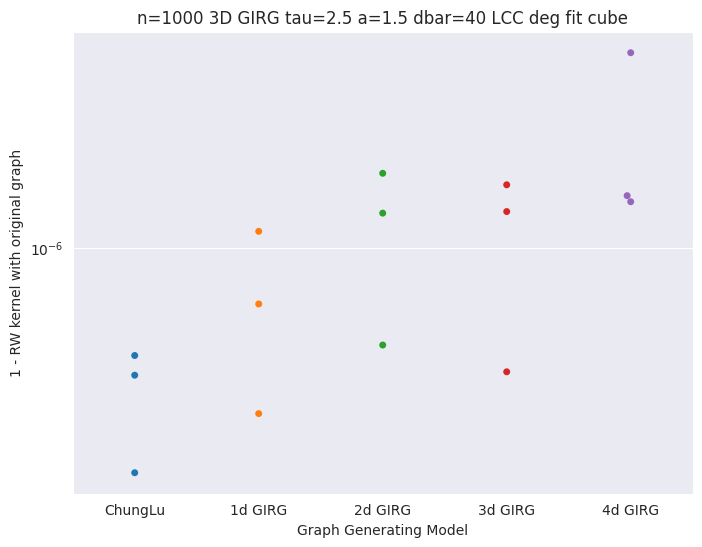

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
folder = '../kernel_generated_plots'
os.makedirs(folder, exist_ok=True)
data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG', '4d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')
plt.title(f"{name}")
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.savefig(f'{folder}/{name}.png')
pickle.dump((fig, ax), open(f'{folder}/{name}.pkl', 'wb'))

In [16]:
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])
# exponential just takes forever???

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]

array([[1.]])

In [26]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])

def temp(d=1):
    # _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=1.3, const=1.0, pts_d=d, diffmap_init=False, graph_name='Reed98', failure_prob=0.3, cl_mixin_prob=0.5)
    # g_MC = MC_to_g_grakel(MC)

    g1, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
                                                                points_type=points.PointsCube, failure_rate=0.3,
                                                                cl_mixin_prob=0.0)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)


def temp_fit(d=1):
    info, g_out = fe.fit_ndgirg_general(d, utils.LCC, cube=False, copy_weights=True, verbose=False)(g)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)

def temp_copyweight_cube(d=1, name='sofcb-Reed98'):
    row = df.loc[df.Graph == name].sort_values('Model').iloc[d-1]
    alpha = row.alpha
    const = float(row.Info['const'])

    weights = np.array(utils.graph_degrees_to_weights(g))
    g1, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, const=const, weights=weights,
                                                                points_type=points.PointsCube)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)

def MC_to_g_grakel(MC):
    _, A_MC = MC.MC_to_g_A()
    return grakel.Graph(A_MC)


In [38]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)
cl
0.9990804428429227
0.9990776207349124
0.9990740809235421
0.9990906643176521
1
0.9991202742809211
0.9991442686936233
0.9991396569092426
0.9990867031672427
2
0.9990572963422394
0.99914131674861
0.999094264845294
0.999094017048572
3
0.9990935569430259
0.9990727826085387
0.999141852540862
0.9991086087897754


<AxesSubplot: >

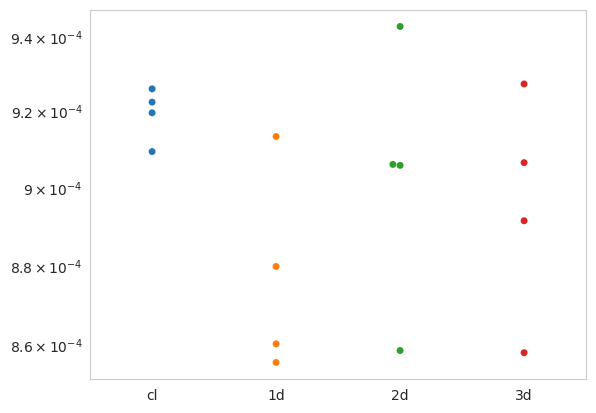

In [46]:
import warnings
import seaborn as sns


name = 'socfb-Amherst41'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)


outs = []

n_per = 4

outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = get_rw_kernel(g_gk1)
    print(out)
    outs[-1].append(out)

for d in range(1, 4):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = temp_copyweight_cube(d=d, name=name)
        outs[-1].append(out)
        print(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')


'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


array([[1.]])

cl
0.9999999977921624
0.9999999918599373
0.9999999811197327
0.999999977744551
1
0.9999994391300787
0.9999987706374487
0.9999989146521039
0.9999988839585013
2
0.9999992973935816
0.9999997289128006
0.9999991832588693
0.9999993900357466
3
0.9999992668916675
0.9999989151483528
0.9999988130952565
0.9999993430895892


<AxesSubplot: >

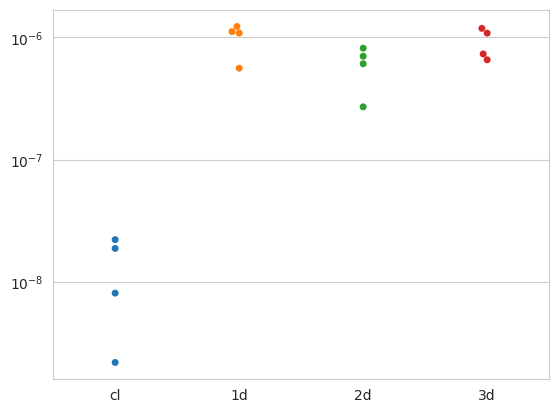

In [47]:
import warnings
import seaborn as sns


name = 'socfb-Amherst41'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)


rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])
# exponential just takes forever???

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]


outs = []

n_per = 4

outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = get_rw_kernel(g_gk1)
    print(out)
    outs[-1].append(out)

for d in range(1, 4):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = temp_copyweight_cube(d=d, name=name)
        outs[-1].append(out)
        print(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')


<AxesSubplot: >

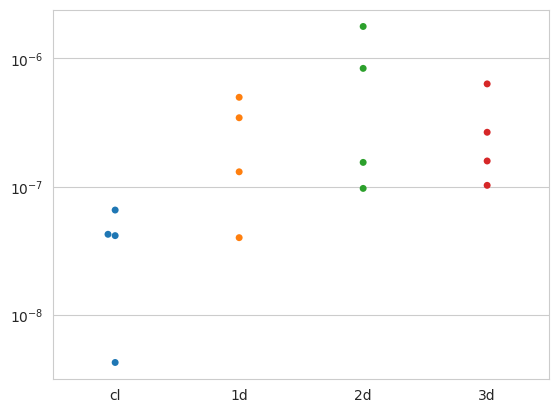

In [40]:
import seaborn as sns
data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')

In [45]:
df_mini.loc[df_mini.Model=='1d-copyweight-cube-girg'].sort_values('Nodes')

,Graph,Model,Type,Nodes,Edges,Info,alpha
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171...",1.217193
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671...",1.076716
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592...",1.059252
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300...",1.163002
6,socfb-Swarthmore42,1d-copyweight-cube-girg,socfb,1657,61392,"{'tau': '5.598783007439967', 'alpha': '1.04234...",1.042345
...,...,...,...,...,...,...,...
162,socfb-MSU24,1d-copyweight-cube-girg,socfb,32345,1115806,"{'tau': '5.112979295133962', 'alpha': '1.02195...",1.021956
167,socfb-UF,1d-copyweight-cube-girg,socfb,35095,1454892,"{'tau': '4.918454781144023', 'alpha': '1.05073...",1.050731
165,socfb-UF21,1d-copyweight-cube-girg,socfb,35101,1448482,"{'tau': '4.918454781144023', 'alpha': '1.04652...",1.046521
117,socfb-Texas84,1d-copyweight-cube-girg,socfb,36354,1576966,"{'tau': '4.774843344808111', 'alpha': '1.01010...",1.010101


<AxesSubplot: >

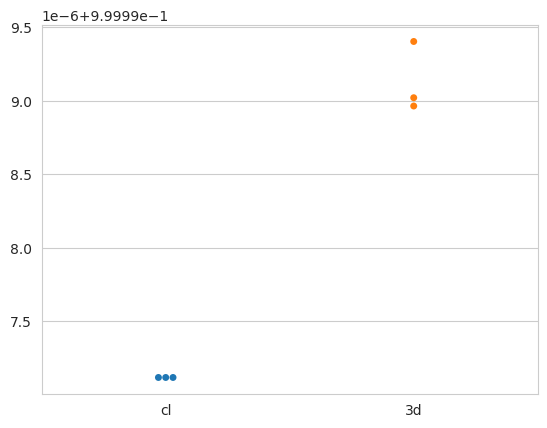

In [45]:
sns.swarmplot(data.loc[:, ['cl', '3d']])

In [61]:
outs[-1] = outs[-1] + [outs[-1][0]]

<AxesSubplot: >

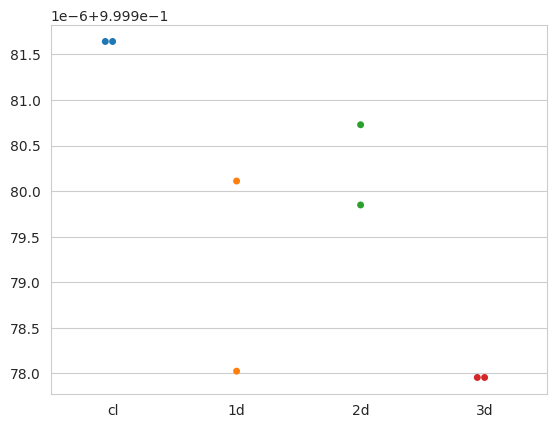

In [62]:
# outs = np.array(outs)
import seaborn as sns
# data = pd.DataFrame(np.array(outs).T, columns=['cl', '1d', '2d', '3d', '4d'])
data = pd.DataFrame(np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)

In [64]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(1, utils.LCC, cube=True, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
starting search at const=0.601171875; depth=6: For alpha=100.0


../benji_girgs/generation.py:647: RuntimeWarning: divide by zero encountered in divide
  """
../benji_girgs/generation.py:648: RuntimeWarning: divide by zero encountered in divide
  n = g_true.numberOfNodes()
../benji_girgs/generation.py:138: RuntimeWarning: overflow encountered in multiply
  p_uv = np.minimum(const * p_uv, 1)
../benji_girgs/generation.py:647: RuntimeWarning: overflow encountered in power
  """
../benji_girgs/generation.py:647: RuntimeWarning: overflow encountered in multiply
  """
../benji_girgs/generation.py:648: RuntimeWarning: overflow encountered in power
  n = g_true.numberOfNodes()
../benji_girgs/generation.py:648: RuntimeWarning: overflow encountered in multiply
  n = g_true.numberOfNodes()


a: 0.3005859375, m: 0.601171875, b: 1.20234375, f_a: 23.313929313929314, f_m: 44.525987525987524, f_b: 87.66943866943868, goal: 39.11018711018711
a: 0.3005859375, m: 0.45087890625000004, b: 0.601171875, f_a: 23.313929313929314, f_m: 33.84199584199584, f_b: 44.525987525987524, goal: 39.11018711018711
a: 0.45087890625000004, m: 0.5260253906250001, b: 0.601171875, f_a: 33.84199584199584, f_m: 40.07276507276507, f_b: 44.525987525987524, goal: 39.11018711018711
a: 0.45087890625000004, m: 0.48845214843750007, b: 0.5260253906250001, f_a: 33.84199584199584, f_m: 36.84407484407485, f_b: 40.07276507276507, goal: 39.11018711018711
a: 0.48845214843750007, m: 0.5072387695312501, b: 0.5260253906250001, f_a: 36.84407484407485, f_m: 37.82744282744283, f_b: 40.07276507276507, goal: 39.11018711018711
calling goal_f(alpha=2.0)
starting search at const=0.3114983948594278; depth=6: For alpha=2.0
a: 0.1557491974297139, m: 0.3114983948594278, b: 0.6229967897188556, f_a: 23.62162162162162, f_m: 44.62577962577

In [75]:
temp = [x.split('=') for x in info.split('|')]
{a: eval(b) for a, b in temp}

{'tau': 4.381732472502371,
 'alpha': 1.0635646032405484,
 'const': 0.12118153114275264,
 'target_lcc': 0.31836022727227925,
 'fit_lcc': 0.31602744973881414,
 'fitting_time': 13.056175947189331,
 'hist': [(2.0, 0.6173220492572326),
  (1.342281879194631, 0.4376142442960426),
  (1.1527377521613833, 0.3591851552021037),
  (1.0767160161507403, 0.32872175111887136),
  (1.0423452768729642, 0.2887513543551115),
  (1.0592519033432637, 0.30417333385864403),
  (1.0679125646587686, 0.32066542408317),
  (1.0635646032405484, 0.3165918680902781)]}

In [8]:
import os
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: var for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: float(x['alpha']) if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

df_mini = df.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'Info', 'alpha']]


In [83]:
df_mini

,Graph,Model,Type,Nodes,Edges,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171..."
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671..."
2,socfb-Caltech36,2d-copyweight-cube-girg,socfb,757,16863,"{'tau': '7.3017225936374555', 'alpha': '1.1949..."
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300..."
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592..."
...,...,...,...,...,...,...
263,socfb-UConn91,2d-copyweight-cube-girg,socfb,17107,605172,"{'tau': '5.145909409369553', 'alpha': '1.08117..."
264,socfb-UMass92,3d-copyweight-cube-girg,socfb,16413,534207,"{'tau': '4.541851675093422', 'alpha': '1.08566..."
265,socfb-UC33,3d-copyweight-cube-girg,socfb,16688,504749,"{'tau': '4.812191215002762', 'alpha': '1.09476..."
266,socfb-UF21,3d-copyweight-cube-girg,socfb,34928,1467958,"{'tau': '4.918454781144023', 'alpha': '1.10870..."


In [81]:
df_mini.Info[1]

'tau=4.381732472502371|alpha=1.0767160161507403|const=0.11990006024738019|target_lcc=0.31836022727227925|fit_lcc=0.3122201463706791|fitting_time=19.216066598892212|hist=[(2.0, 0.601654218661161), (1.342281879194631, 0.4500069992020386), (1.1527377521613833, 0.34883587407667926), (1.0767160161507403, 0.3162678611423067), (1.1134307585247043, 0.3359806839067379), (1.0947656517276771, 0.32100278073945815), (1.0856658184902461, 0.33016551433112173), (1.0767160161507403, 0.3162678611423067)]'

In [68]:
{a: eval(b) for x in info.split('|') for a, b in x.split('=')}

ValueError: too many values to unpack (expected 2)

In [69]:
[(a, b) for a in range(3) for b in range(5)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4)]

In [51]:
get_rw_kernel([g_out])

ValueError: Unsupported input type. For more information check the documentation, concerning valid input types for graph type object.

In [34]:
nk.overview(g)

Network Properties:
nodes, edges			1000, 22427
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.044899
clustering coefficient		0.257323
min/max/avg degree		7, 772, 44.854000
degree assortativity		-0.148806
number of connected components	1
size of largest component	1000 (100.00 %)


<AxesSubplot: >

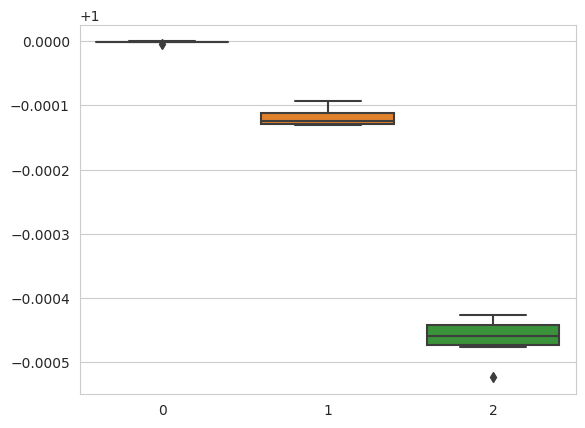

In [32]:
outs = np.array(outs)
import seaborn as sns
sns.boxplot(data=outs.T)

In [25]:
outs = np.array(outs)

<AxesSubplot: >

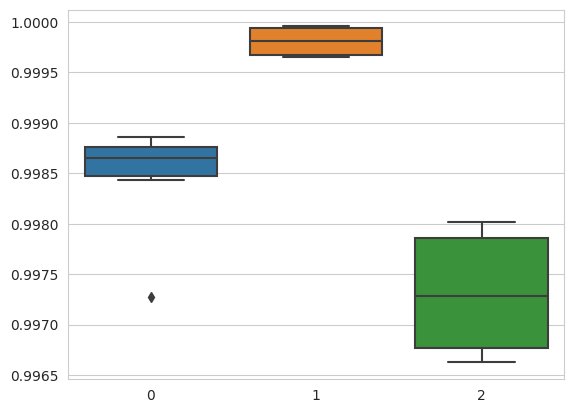

In [26]:
import seaborn as sns
sns.boxplot(data=outs.T)

In [25]:
print(f'MC: {MC.ll}')
print(f'MC_dm: {MC_dm.ll}')
print(f'MC2: {MC2.ll}')
print(f'MC_dm2: {MC_dm2.ll}')
print(f'MC_pickle: {MC_pickle.ll}')
print(f'MC_pickle2: {MC_pickle2.ll}')
print(f'chung_lu_ll: {chung_lu_ll}')

MC: -137860.2683948932
MC_dm: -131448.12255962266
MC2: -139035.93735796952
MC_dm2: -129457.22462367786
MC_pickle: -125363.74972813886
MC_pickle2: -124276.07541961469
chung_lu_ll: -128476.06068462234


In [31]:
_, A_MC = MC.MC_to_g_A()
_, A_MC_dm = MC_dm.MC_to_g_A()
_, A_MC_pickle = MC_pickle.MC_to_g_A()
_, A_MC2 = MC2.MC_to_g_A()
_, A_MC_dm2 = MC_dm2.MC_to_g_A()
_, A_MC_pickle2 = MC_pickle2.MC_to_g_A()

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:597: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:598: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


In [32]:
g_MC = grakel.Graph(A_MC)
g_MC_dm = grakel.Graph(A_MC_dm)
g_MC_pickle = grakel.Graph(A_MC_pickle)
g_MC2 = grakel.Graph(A_MC2)
g_MC_dm2 = grakel.Graph(A_MC_dm2)
g_MC_pickle2 = grakel.Graph(A_MC_pickle2)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)
g_CL = grakel.Graph(A_cl)

In [17]:
from grakel import GraphKernel
# sp_kernel = GraphKernel(kernel="shortest_path", with_labels=False)

sp_kernel = grakel.kernels.ShortestPath(with_labels=False)
sp_kernel_normalised = grakel.kernels.ShortestPath(with_labels=False, normalize=True)

rw_kernel = grakel.kernels.RandomWalk(normalize=False)
gs_kernel = grakel.kernels.GraphletSampling(n_jobs=5, normalize=True)

In [24]:
sp_kernel = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
sp_kernel.fit_transform([g_gk])
sp_kernel.transform([g_MC_gk])

array([[1.]])

array([[0.99811444]])

In [27]:
def get_sp_kernel(g1, g2):
    sp_kernel = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
    sp_kernel.fit_transform([g1])
    return sp_kernel.transform([g2])[0, 0]

get_sp_kernel(g_gk, g_MC_gk)

0.9981144435698038

In [36]:
# def get_rw_kernel(g1, g2):
#     rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)
#     rw_kernel.fit_transform([g1])
#     return rw_kernel.transform([g2])[0, 0]

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)
rw_kernel.fit_transform([g_gk])

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]

array([[1.]])

In [29]:
sp_kernel_normalised = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)

array([[1.        , 3.76081314],
       [3.76081314, 1.        ]])

array([[1.        , 2.40027707],
       [2.40027707, 1.        ]])

array([[1.        , 1.86030097],
       [1.86030097, 1.        ]])

In [33]:
rw_kernel.fit_transform([g_gk, g_CL])

array([[1.        , 1.86030097],
       [1.86030097, 1.        ]])

In [34]:
rw_kernel.fit_transform([g_gk, g_MC])
rw_kernel.fit_transform([g_gk, g_MC_dm])
rw_kernel.fit_transform([g_gk, g_MC_pickle])

array([[1.        , 3.26718743],
       [3.26718743, 1.        ]])

array([[1.        , 2.38644082],
       [2.38644082, 1.        ]])

array([[1.        , 2.80388135],
       [2.80388135, 1.        ]])

In [35]:
rw_kernel.fit_transform([g_gk, g_MC2])
rw_kernel.fit_transform([g_gk, g_MC_dm2])
rw_kernel.fit_transform([g_gk, g_MC_pickle2])

array([[ 1.        , 11.11950001],
       [11.11950001,  1.        ]])

array([[1.        , 2.23600994],
       [2.23600994, 1.        ]])

array([[1.        , 2.80352438],
       [2.80352438, 1.        ]])

In [39]:
for d in [1, 2, 3, 4, 5]:
    print(d)
    _, _, _, _, _, MC_temp = mcmc.g_initialised_mcmc(g, 1.2, 1.0, pts_d=2, diffmap_init=False, graph_name='Reed98', failure_prob=0.3, cl_mixin_prob=0.5)
    _, A_MC_temp = MC_temp.MC_to_g_A()
    g_MC_temp = grakel.Graph(A_MC_temp)
    print(get_rw_kernel(g_MC_temp))


1
calibrating const
const: 1.0, expected_num_edges: 48068.583489804994
const: 0.39135748620489086, expected_num_edges: 30370.497031774434
const: 0.24241345219947688, expected_num_edges: 24268.47856832681
const: 0.1879096726206915, expected_num_edges: 21698.33377165328
const: 0.16291374252701923, expected_num_edges: 20441.07688473585
const: 0.14993013047697315, expected_num_edges: 19763.409983407142
const: 0.14271249834420413, expected_num_edges: 19378.652792121684
4.246706290743519
2
calibrating const
const: 1.0, expected_num_edges: 47559.57528476552
const: 0.3955460049288106, expected_num_edges: 30107.578105788325
const: 0.2471474596387484, expected_num_edges: 24160.48401913088
const: 0.19243563196178817, expected_num_edges: 21655.516112034482
const: 0.16716752857501208, expected_num_edges: 20417.368355170074
const: 0.15402354959995684, expected_num_edges: 19750.513344559335
const: 0.14670459266176789, expected_num_edges: 19372.096435222473
3.012945721995179
3
calibrating const
const:

KeyboardInterrupt: 

In [30]:
rw_kernel.fit_transform([g_gk, g_MC_pickle])

array([[1.        , 3.12473866],
       [3.12473866, 1.        ]])

In [29]:
help(grakel.kernels.RandomWalk)

Help on class RandomWalk in module grakel.kernels.random_walk:

class RandomWalk(grakel.kernels.kernel.Kernel)
 |  RandomWalk(n_jobs=None, normalize=False, verbose=False, lamda=0.1, method_type='fast', kernel_type='geometric', p=None)
 |  
 |  The random walk kernel class.
 |  
 |  See :cite:`kashima2003marginalized`, :cite:`gartner2003graph`
 |  and :cite:`vishwanathan2006fast`.
 |  
 |  Parameters
 |  ----------
 |  lambda : float
 |      A lambda factor concerning summation.
 |  
 |  method_type : str, valid_values={"baseline", "fast"}
 |      The method to use for calculating random walk kernel:
 |          + "baseline" *Complexity*: :math:`O(|V|^6)`
 |            (see :cite:`kashima2003marginalized`, :cite:`gartner2003graph`)
 |          + "fast" *Complexity*: :math:`O((|E|+|V|)|V||M|)`
 |            (see :cite:`vishwanathan2006fast`)
 |  
 |  kernel_type : str, valid_values={"geometric", "exponential"}
 |      Defines how inner summation will be applied.
 |  
 |  p : int or None


In [13]:
K = sp_kernel_normalised.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = sp_kernel_normalised.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = sp_kernel_normalised.fit_transform([g_gk, g_CL_gk])
print(K2)

[[1.         0.99811444]
 [0.99811444 1.        ]]
[[1.         0.99225746]
 [0.99225746 1.        ]]
[[1.         0.98077829]
 [0.98077829 1.        ]]


In [15]:
K = sp_kernel_normalised.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = sp_kernel_normalised.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = sp_kernel_normalised.fit_transform([g_gk, g_CL_gk])
print(K2)

[[1.         0.99811444]
 [0.99811444 1.        ]]
[[1.         0.99225746]
 [0.99225746 1.        ]]
[[1.         0.98077829]
 [0.98077829 1.        ]]


In [18]:
K = rw_kernel.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = rw_kernel.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = rw_kernel.fit_transform([g_gk, g_CL_gk])
print(K2)

[[ 103194.75668132 -181671.67808457]
 [-181671.67808457  -22338.72470025]]
[[ 103194.75668132 -317003.15497867]
 [-317003.15497867 -566440.74507411]]
[[ 103194.75668132  102674.57379999]
 [ 102674.57379999 -561337.38579245]]


In [19]:
K, K1

(array([[1.        , 0.99899907],
        [0.99899907, 1.        ]]),
 array([[1.        , 0.98077829],
        [0.98077829, 1.        ]]))

In [36]:
K, K1

(array([[ 1., nan],
        [nan, -1.]]),
 array([[ 1., nan],
        [nan, -1.]]))

In [37]:
nk.overview(g)

Network Properties:
nodes, edges			962, 18812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040697
clustering coefficient		0.318360
min/max/avg degree		1, 313, 39.110187
degree assortativity		0.024395
number of connected components	1
size of largest component	962 (100.00 %)


In [28]:
K = sp_kernel.fit_transform([g_temp_gk, g_gk])
K2 = sp_kernel_normalised.fit_transform([g_temp_gk, g_gk])

In [29]:
K
K2

array([[3.67635764e+11, 3.63211829e+11],
       [3.63211829e+11, 3.59653652e+11]])

array([[1.        , 0.99886977],
       [0.99886977, 1.        ]])

In [7]:
import pickle

name='socfb-Swarthmore42'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

pickle_path = '../../MCMC_run_fp_0p3_cl_0p5_v2/pickles/'
with open(pickle_path + name + '-1d' + '.pkl', 'rb') as file:
    MC1 = pickle.load(file)

MC1.calibrate_const()

with open(pickle_path + name + '-2d' + '.pkl', 'rb') as file:
    MC2 = pickle.load(file)

MC2.calibrate_const()

'/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne'

Network Properties:
nodes, edges			1657, 61049
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.044496
clustering coefficient		0.296897
min/max/avg degree		1, 577, 73.686180
degree assortativity		0.061163
number of connected components	1
size of largest component	1657 (100.00 %)


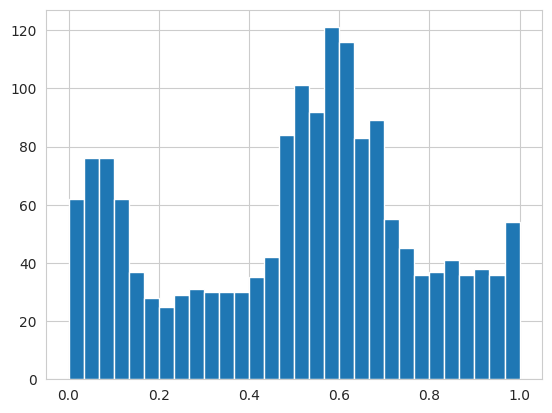

In [8]:
_ = plt.hist(MC1.pts[:, 0], bins=30)

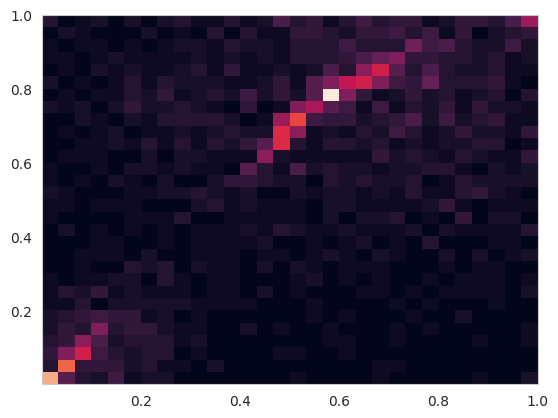

In [9]:
_ = plt.hist2d(MC2.pts[:, 0], MC2.pts[:, 1], bins=30)

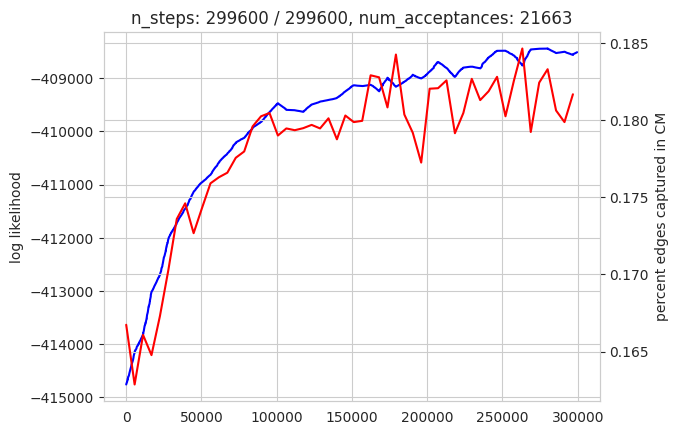

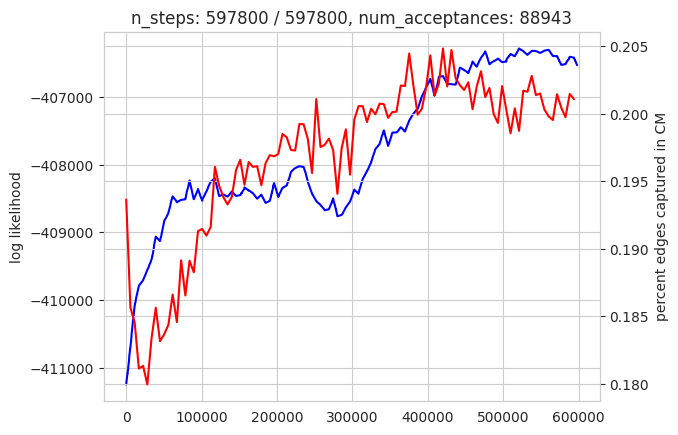

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)


In [19]:
importlib.reload(mcmc)
importlib.reload(generation)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [20]:
alpha = MC1.alpha
const=MC1.const
lls = []
for _ in range(2):
    print(_)
    i = 0
    graph_name = name
    _, _, _, _, pts, MC_prior = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                    diffmap_init=False, graph_name=graph_name + f'-{i+1}d',
                                                                            failure_prob=0.3, cl_mixin_prob=0.5)
    lls.append(MC_prior.ll)

0
calibrating const
const: 0.11027144113091161, expected_num_edges: 51782.386914062554
const: 0.13000484548488095, expected_num_edges: 54751.59647450031
const: 0.14495770576667794, expected_num_edges: 56924.876490861854
const: 0.15545967817375123, expected_num_edges: 58415.308628834544
const: 0.1624686767150731, expected_num_edges: 59394.12274976218
const: 0.16699548348524454, expected_num_edges: 60020.396973969546
const: 0.16985737824613453, expected_num_edges: 60413.84415580018
1
calibrating const
const: 0.11027144113091161, expected_num_edges: 51797.964067984285
const: 0.12996574924770007, expected_num_edges: 54770.817172966934
const: 0.14486325812460107, expected_num_edges: 56945.072557326566
const: 0.1553032887322387, expected_num_edges: 58434.39215167722
const: 0.16225223065903507, expected_num_edges: 59410.73710529938
const: 0.16672636819750694, expected_num_edges: 60033.708928759945
const: 0.16954604727434167, expected_num_edges: 60424.10155801656


In [21]:
lls

[-450449.67519169167, -449984.8583343092]

In [23]:
chung_lu_ll, er_ll, A_cl, probs_cl = generation.chung_lu_get_stuff(MC_prior.g)
print(chung_lu_ll, er_ll)

-423188.2874977369 -1901990.3182789893


In [22]:
MC_prior.outs[0]

(array([[  12000,  110098],
        [ 107110, 2516441]]),
 0)

In [23]:
MC1.outs[0]

(array([[  20358,  101740],
        [ 101456, 2522095]]),
 0)

In [121]:
alpha = MC2.alpha
const = MC2.const
i=1

# _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=False, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

_, _, _, _, _, MC_dm = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=True, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

calibrating const
const: 0.04532197721532701, expected_num_edges: 59946.8871166855
const: 0.014222540591893745, expected_num_edges: 32130.768001902805
const: 0.008327047570069298, expected_num_edges: 23147.950971812304
const: 0.006767269339687878, expected_num_edges: 20265.172586641856
const: 0.006282002794396346, expected_num_edges: 19308.27407722848
const: 0.006120538588560746, expected_num_edges: 18982.81673054486
const: 0.006065462969082773, expected_num_edges: 18871.068299147813


In [118]:
MC_temp1.calculate_ll()
MC_temp2.calculate_ll()

(-169331.2210693177, 18810.98512856123)

(-165513.67828647894, 18832.78446100949)

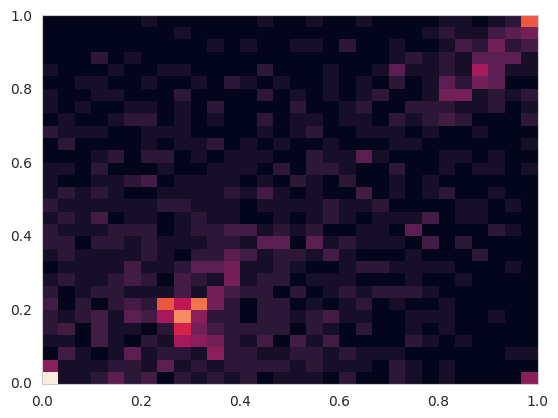

In [129]:
%matplotlib inline
_ = plt.hist2d(MC_dm.pts[:, 0], MC_dm.pts[:, 1], bins=30)

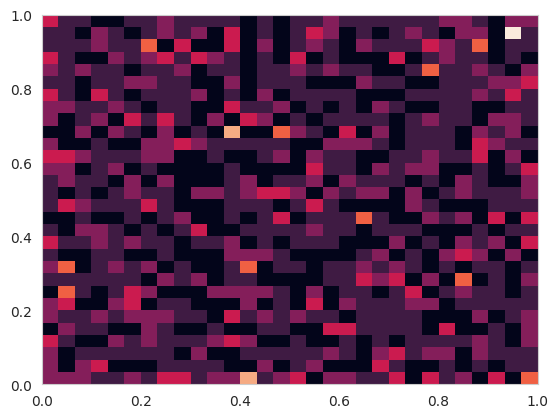

In [138]:
%matplotlib inline
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [143]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [144]:
MC.plot_ll(MC.num_steps, CM=True)

In [133]:
MC.run_pool(800000, pool_size=15, jobs_per_worker=200, plot_every=20000)

801000it [05:14, 2547.45it/s]                            


In [145]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [146]:
MC_dm.plot_ll(MC_dm.num_steps, CM=True)

In [147]:
MC_dm.g.numberOfNodes()

962

In [148]:
MC_dm.pts.shape

(962, 2)

In [127]:
MC_dm.run_pool(100000, pool_size=15, jobs_per_worker=80, plot_every=5000)

100800it [01:11, 1403.02it/s]                           


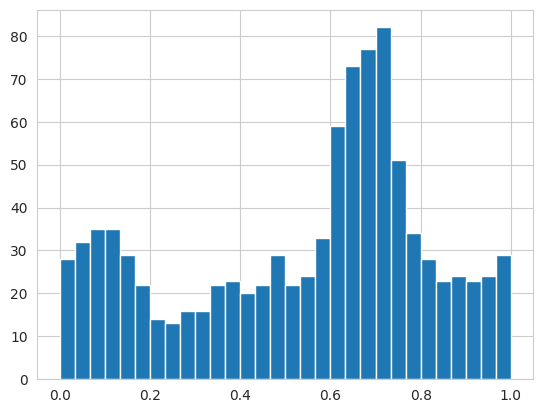

In [22]:
%matplotlib inline
_ = plt.hist(MC.pts[:, 0], bins=30)

In [78]:
fe = feature_extractor.FeatureExtractor([])
cl = fe.fit_chung_lu(g)

weights = utils.graph_degrees_to_weights(g)
c, probs_cl = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs_cl)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

g_cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_cl)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

chunglu LL: -128476.06068462232
er LL: -640802.091778406
[[  1480  36144]
 [ 36346 851474]]
0.03933659366361897 0.9608734732723524


In [26]:
MC.calculate_ll()

(-143216.9045256718, 18811.572108576074)

In [89]:
self = MC
ll = 0
expected_num_edges = 0
P = np.zeros_like(A, dtype=np.float64)
L = np.zeros_like(A, dtype=np.float64)

for u_index in range(self.n):
    eps = 1e-7
    p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
    p_u_to_vs *= (1 - self.failure_prob)
    ##### Mix in CL
    p_u_to_vs = 0.5*p_u_to_vs + 0.5*probs_cl[u_index]
    #####
    expected_num_edges += p_u_to_vs.sum()
    p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
    P[:, u_index] = p_u_to_vs
    u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
    ###
    out = 0
    n = g.numberOfNodes()
    assert n == len(p_u_to_vs)
    mask = np.ones(n, dtype=bool)
    for nhb in g.iterNeighbors(u_index):
        mask[nhb] = False
        out += np.log(p_u_to_vs[nhb])
    L[~mask, u_index] = np.log(p_u_to_vs[~mask])
    mask[u_index] = False
    out += np.log(1 - p_u_to_vs[mask]).sum()
    L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
    ll += u_ll

print(ll, expected_num_edges/2)

-126121.13094076623 18823.635308670997


In [84]:
g.numberOfEdges()

18812

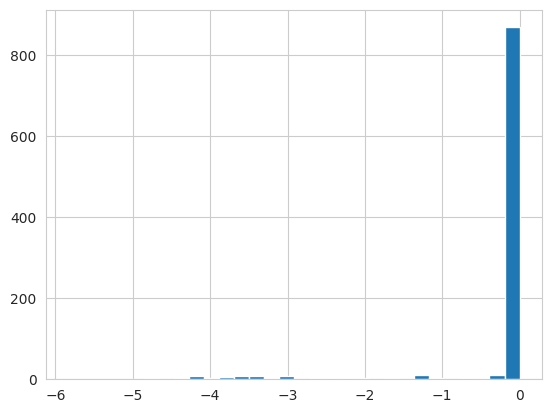

In [59]:
%matplotlib inline
_ = plt.hist(L[:, 0], bins=30)

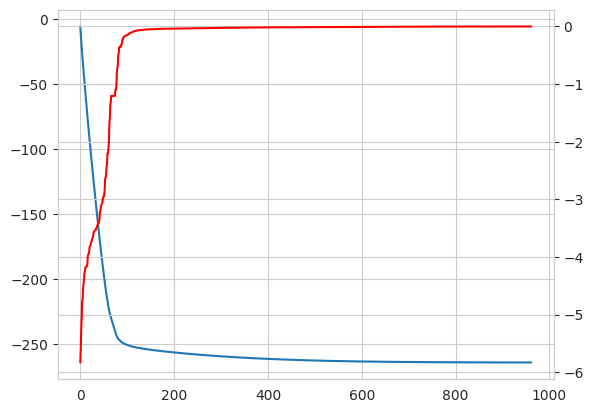

In [66]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(np.cumsum(sorted(L[:, 0])))
ax2.plot(sorted(L[:,0]), color='r')

In [67]:
mask

73

In [79]:
probs_cl.shape

(962, 962)

In [80]:
u_index = 0
eps = 1e-7
# p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
p_u_to_vs = probs_cl[u_index]
p_u_to_vs *= (1 - self.failure_prob)
expected_num_edges += p_u_to_vs.sum()
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
# P[:, u_index] = p_u_to_vs
u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
###
out = 0
n = g.numberOfNodes()
assert n == len(p_u_to_vs)
mask = np.ones(n, dtype=bool)
for nhb in g.iterNeighbors(u_index):
    mask[nhb] = False
    out += np.log(p_u_to_vs[nhb])
# L[~mask, u_index] = np.log(p_u_to_vs[~mask])
mask[u_index] = False
out += np.log(1 - p_u_to_vs[mask]).sum()
# L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
# ll += u_ll

<Figure size 640x480 with 0 Axes>

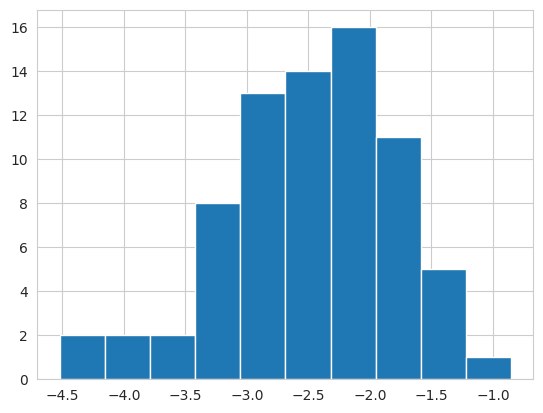

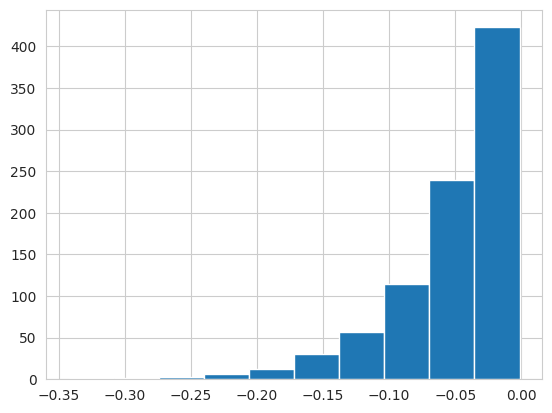

In [81]:
_ = plt.hist(np.log(p_u_to_vs[~mask]))
plt.figure()
_ = plt.hist(np.log(1 - p_u_to_vs[mask]))

<Figure size 640x480 with 0 Axes>

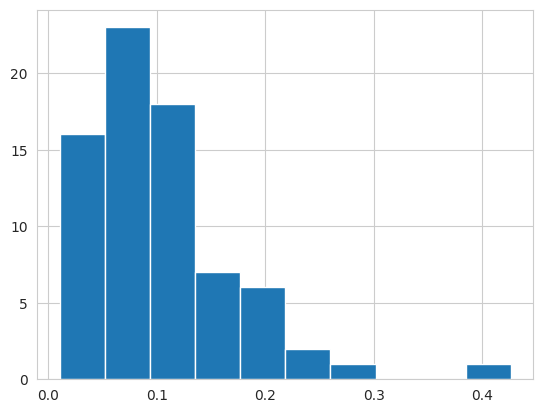

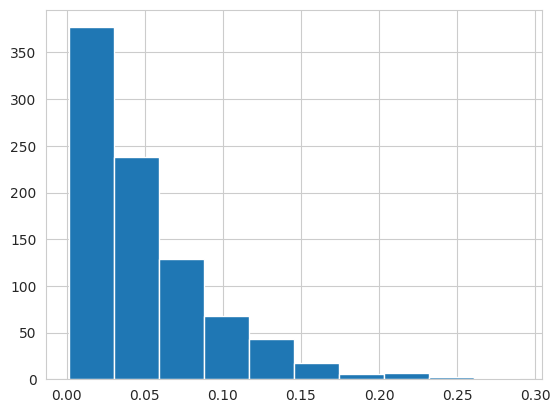

In [82]:
_ = plt.hist(p_u_to_vs[~mask])
plt.figure()
_ = plt.hist(p_u_to_vs[mask])

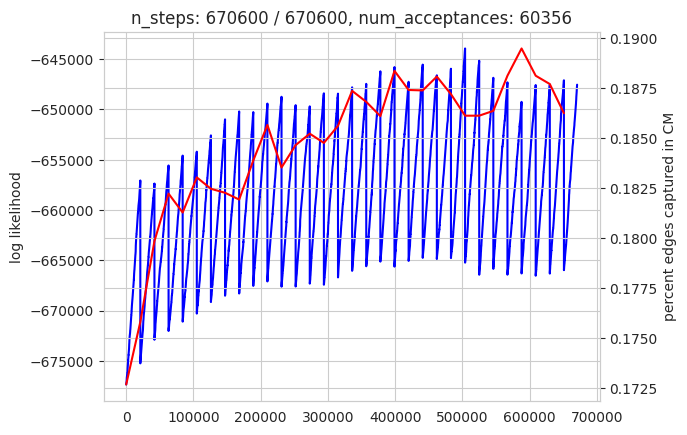

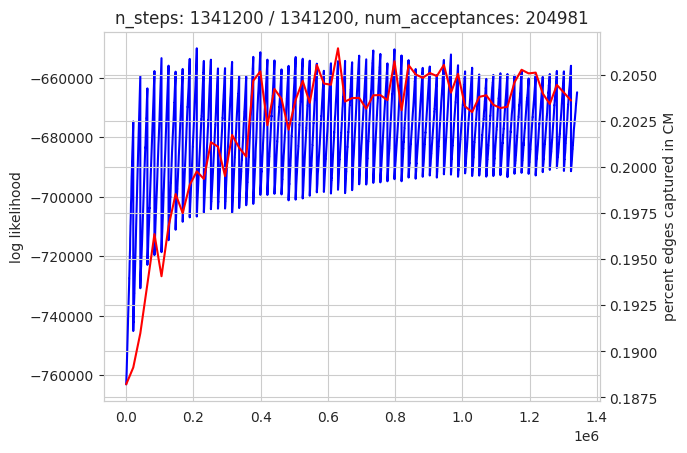

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)

In [15]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

argsorted = np.argsort(g_degs)[::-1]
fe = feature_extractor.FeatureExtractor([])

cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
# A_cl = A_cl[:, argsorted][argsorted, :]

out, p1, p2 = mcmc.CM(MC1.A[:, argsorted][argsorted, :], A_cl)
print(p1, p2)
print(out)

weights = utils.graph_degrees_to_weights(g)
c, probs = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

0.09493810057831431 0.9050671181521345
[[  17270  164638]
 [ 164648 4648669]]
chunglu LL: -670400.0038853943
er LL: -3460876.941063832


In [16]:
self = MC1
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = self.get_CM(self.A)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

../benji_girgs/generation.py:125: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:586: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:587: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


[[  34192  147716]
 [ 145568 4667749]]
0.18796314620577434 0.8097908322207388


In [20]:
ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

(-666249.1723944361, 91118.34111135668)

In [25]:
ll - n * np.log(n)

-683485.4845876876